# Тензори

Садржај:

1. [NumPy низови као тензори](#NumPy-низови-као-тензори)
1. [Основне операције над тензорима](#Основне-операције-над-тензорима)
1. [Специјални методи над NumPy низовима](#Специјални-методи-над-NumPy-низовима)
1. [Множење тензора](#Множење-тензора)

## NumPy низови као тензори

In [1]:
import numpy as np

Као што је познато из рада са матрицама, први индекс (индекс врста) има одређену функционалну предност у NumPy низовима. Тако да би се добио објекат података који функционише као математички појам матрице њене елементе уносимо врсту по врсту. Слично је и са тензорима. Да би вишедимензионални низови података одговарали уведеној конвенцији требало би их уносити пресецима по индексима по принципу угњеждених петљи пратећи распоред индекса - први индекс је у спољној петљи, последњи индекс је у најдубље постављеној петљи.

**Пример 1.** Kреираћемо тензор димензије $3$ типа $2\times2\times2$ бројева од $0$ до $7$ како бисмо разумели NumPy низове у својству тензора. У те сврхе користимо комбинацију наредбе `arange` и метода `reshape`.
<div>
   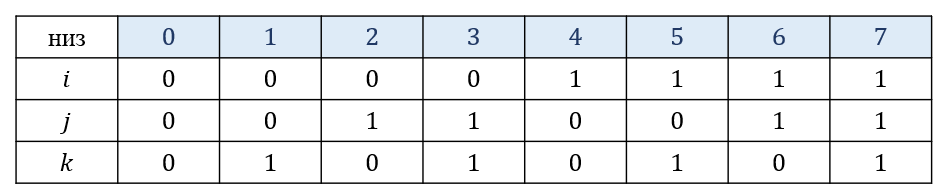  
</div>

In [2]:
T=np.arange(8).reshape(2,2,2)
T

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

Начин формирања овог тродимензионалног NumPy низа упознаћемо кроз сечења: фронтално, хоризонтално и бочно.

Фронтална сечења:

In [3]:
T[:,:,0]

array([[0, 2],
       [4, 6]])

In [4]:
T[:,:,1]

array([[1, 3],
       [5, 7]])

Фронтални пресеци сугеришу следећи графички приказ тензора $T:$
<div>
   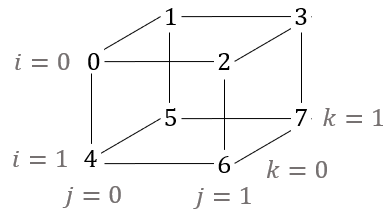  
</div>

Кроз даље пресеке проверићемо слагање уведене конвенције са функционалношћу NumPy библиотеке. Потражићемо хоризонталне пресеке.

In [5]:
T[0,:,:]

array([[0, 1],
       [2, 3]])

Први индекс опет показује функционалну предност у односу на преостале индексе. За пресеке по овом индексу довољно је навођење само његове вредности.

In [6]:
T[0]

array([[0, 1],
       [2, 3]])

In [7]:
T[1,:,:]

array([[4, 5],
       [6, 7]])

Бочни пресеци:

In [8]:
T[:,0,:]

array([[0, 1],
       [4, 5]])

In [9]:
T[:,1,:]

array([[2, 3],
       [6, 7]])

<div>
   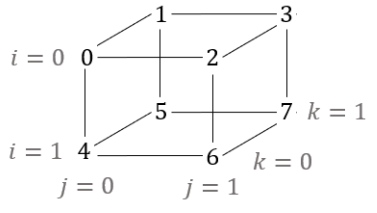  
</div>
Вектори (влакна, једнодимензионални тензори) унутар тензора добијају се сечењем по два индекса. Нпр. све вертикалне векторе добијамо следећим кодом.

In [10]:
for j in range(2):
    for k in range(2):
        print(T[:,j,k],"\n")

[0 4] 

[1 5] 

[2 6] 

[3 7] 



Хоризонтална фронтална влакна:

In [11]:
for i in range(2):
    for k in range(2):
        print(T[i,:,k],"\n")

[0 2] 

[1 3] 

[4 6] 

[5 7] 



Хоризонтална бочна влакна:

In [12]:
for i in range(2):
    for j in range(2):
        print(T[i,j,:],"\n")

[0 1] 

[2 3] 

[4 5] 

[6 7] 



На основу овог примера постаје јасно како уносити елементе вишедимензионалног низа како би индексирање и пресеци одговарали уведеној конвенцији.

**Пример 2.**  Креираћемо тензор са следеће слике:
<div>
   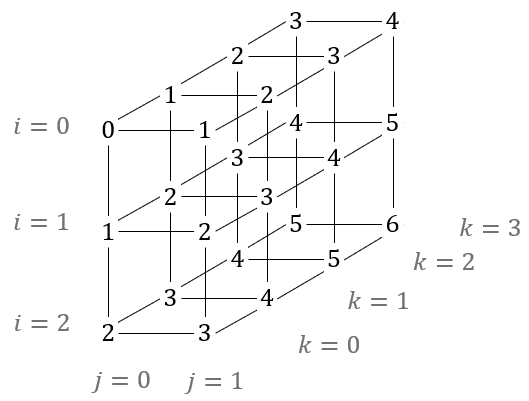  
</div>

In [13]:
lista=[[[i+j+k for k in range(4)] for j in range(2)] for i in range(3)]
A=np.array(lista)
A  #prikaz kroz horizontalne preseke

array([[[0, 1, 2, 3],
        [1, 2, 3, 4]],

       [[1, 2, 3, 4],
        [2, 3, 4, 5]],

       [[2, 3, 4, 5],
        [3, 4, 5, 6]]])

Фронтални пресеци:

In [14]:
for k in range(4):
    print(A[:,:,k],"\n")

[[0 1]
 [1 2]
 [2 3]] 

[[1 2]
 [2 3]
 [3 4]] 

[[2 3]
 [3 4]
 [4 5]] 

[[3 4]
 [4 5]
 [5 6]] 



Бочни пресеци:

In [15]:
for j in range(2):
    print(A[:,j,:],"\n")

[[0 1 2 3]
 [1 2 3 4]
 [2 3 4 5]] 

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]] 



Вертикална влакна:

In [16]:
for j in range(2):
    for k in range(4):
        print(A[:,j,k],"\n")

[0 1 2] 

[1 2 3] 

[2 3 4] 

[3 4 5] 

[1 2 3] 

[2 3 4] 

[3 4 5] 

[4 5 6] 



Хоризонтална фронтална влакна:

In [17]:
for i in range(3):
    for k in range(4):
        print(A[i,:,k],"\n")

[0 1] 

[1 2] 

[2 3] 

[3 4] 

[1 2] 

[2 3] 

[3 4] 

[4 5] 

[2 3] 

[3 4] 

[4 5] 

[5 6] 



Хоризонтална бочна влакна:

In [18]:
for i in range(3):
    for j in range(2):
        print(A[i,j,:],"\n")

[0 1 2 3] 

[1 2 3 4] 

[1 2 3 4] 

[2 3 4 5] 

[2 3 4 5] 

[3 4 5 6] 



**Пример 3.** Креираћемо тензор са слике:
<div>
   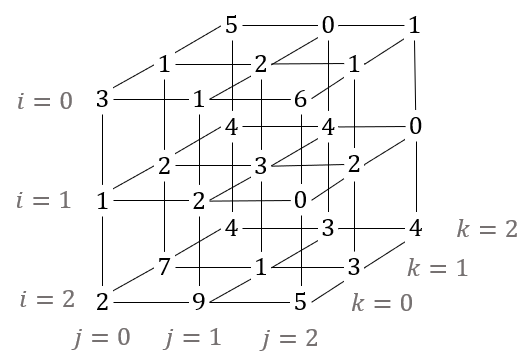  
</div>
С обзиром да елементи тензора не подлежу никаквиј правилности, уносимо их редом према хоризонталним пресецима. Проверу уноса обавићемо кроз фронталне пресеке.

In [19]:
B=np.array([[[3,1,5],[1,2,0],[6,1,1]],
            [[1,2,4],[2,3,4],[0,2,0]],
            [[2,7,4],[9,1,3],[5,3,4]]])
for k in range(3):
    print(B[:,:,k],"\n")

[[3 1 6]
 [1 2 0]
 [2 9 5]] 

[[1 2 1]
 [2 3 2]
 [7 1 3]] 

[[5 0 1]
 [4 4 0]
 [4 3 4]] 



**Пример 4.** Креираћемо тродимензионални нула-тензор и тензор свих јединица применом уграђених функција библиотеке NumPy.

In [20]:
O=np.zeros((2,3,2))
O

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [21]:
E=np.ones((2,2,3))
E

array([[[1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.]]])

**Напомена :** Код наредби и метода где се наводи тип вишедимензионалног низа, на месту типа података `tuple`, нпр. `(2,3,2)`, могу да се користе листе, нпр. `[2,3,2]`, или низови, нпр. `np.array([2,3,2])`.

**Пример 5.** Помоћу функција `diag` и `eye` креираћемо тензоре посебних дијагоналних облика.
<div>
   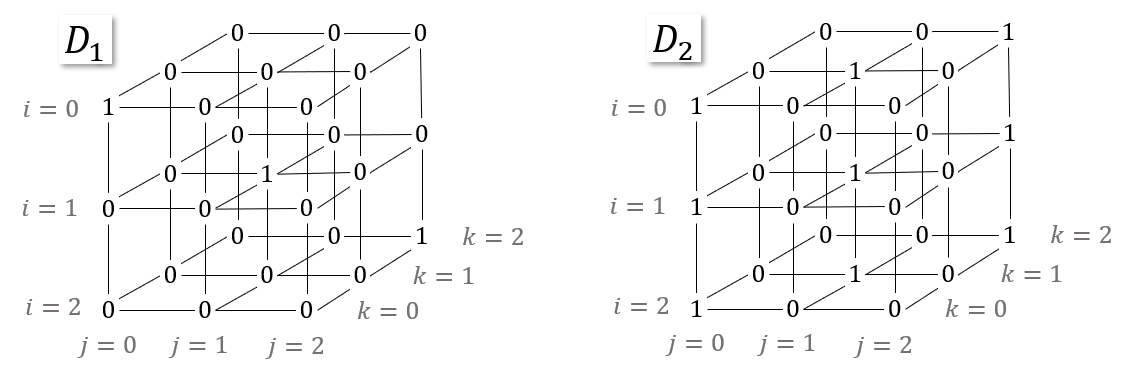  
</div>

In [22]:
D1=np.array([np.diag([1,0,0]),np.diag([0,1,0]),np.diag([0,0,1])])
for k in range(3):
    print(D1[:,:,k],"\n")   #frontalni preseci

[[1 0 0]
 [0 0 0]
 [0 0 0]] 

[[0 0 0]
 [0 1 0]
 [0 0 0]] 

[[0 0 0]
 [0 0 0]
 [0 0 1]] 



In [23]:
D2=np.array([np.eye(3),np.eye(3),np.eye(3)])
for k in range(3):
    print(D2[:,:,k],"\n")   #frontalni preseci

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]] 

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]] 

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]] 



Наредне тензоре креираћемо индексирањем.
<div>
   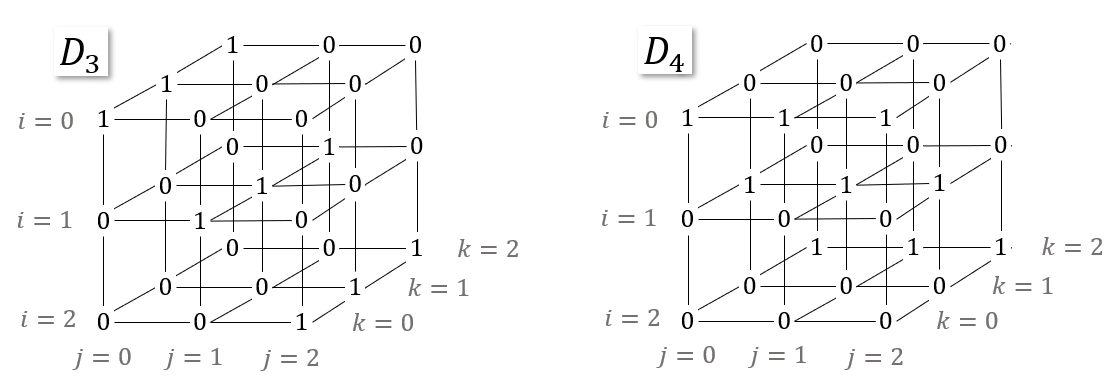  
</div>

In [24]:
D3=np.zeros((3,3,3))
for i in range(3):
    D3[i,i,:]=1
for k in range(3):
    print(D3[:,:,k],"\n")   #frontalni preseci    

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 



In [25]:
D4=np.zeros((3,3,3))
for i in range(3):
    D4[i,:,i]=1
for k in range(3):
    print(D4[:,:,k],"\n")   #frontalni preseci    

[[1. 1. 1.]
 [0. 0. 0.]
 [0. 0. 0.]] 

[[0. 0. 0.]
 [1. 1. 1.]
 [0. 0. 0.]] 

[[0. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]] 



## Основне операције над тензорима

Операције сабирања и множења скаларом функционишу баш као што смо их упознали над једнодимензионалним и дводимензионалним NumPy низовима. Такође, могуће су кодне скарећинце сабирања и множења део-по-део. Том приликом функционалну предност имају индекси посматрани с лева на десно.

**Пример 6.** На примеру тензора типа $2\times3\times4$ упознаћемо основну функционалност операција `+` и `*`.

In [26]:
A=np.arange(2*3*4).reshape(2,3,4)
B=np.array([[[(-1)**(i*(j+k)) for k in range(4)] for j in range(3)] for i in range(2)])

In [27]:
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [28]:
B

array([[[ 1,  1,  1,  1],
        [ 1,  1,  1,  1],
        [ 1,  1,  1,  1]],

       [[ 1, -1,  1, -1],
        [-1,  1, -1,  1],
        [ 1, -1,  1, -1]]])

Креирани су тензори који одговарају следећем графичком приказу:
<div>
   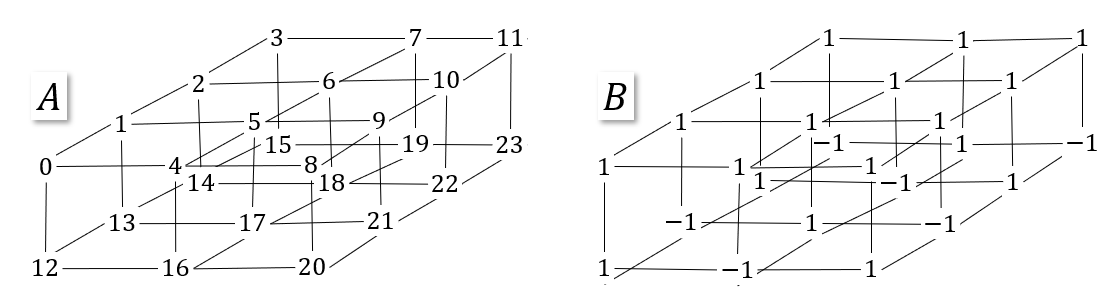  
</div>

In [29]:
A+B   #clan-po-clan sabiranje

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 12, 15, 14],
        [15, 18, 17, 20],
        [21, 20, 23, 22]]])

In [30]:
A-B

array([[[-1,  0,  1,  2],
        [ 3,  4,  5,  6],
        [ 7,  8,  9, 10]],

       [[11, 14, 13, 16],
        [17, 16, 19, 18],
        [19, 22, 21, 24]]])

Кодном скраћеницом можемо свим елементима тензора да додамо исту вредност.

In [31]:
A-5   #clan-po-clan sabiranje

array([[[-5, -4, -3, -2],
        [-1,  0,  1,  2],
        [ 3,  4,  5,  6]],

       [[ 7,  8,  9, 10],
        [11, 12, 13, 14],
        [15, 16, 17, 18]]])

In [32]:
A+B[1]  #matrica-po-matrica sabiranje po horizontalnim presecima

array([[[ 1,  0,  3,  2],
        [ 3,  6,  5,  8],
        [ 9,  8, 11, 10]],

       [[13, 12, 15, 14],
        [15, 18, 17, 20],
        [21, 20, 23, 22]]])

Шематски приказ ове кодне скраћенице дат је наредном сликом.
<div>
   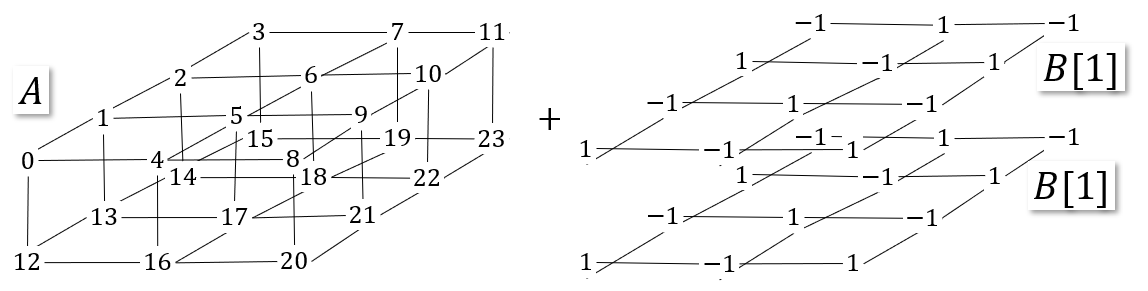  
</div>

In [33]:
A+B[:,1,:].reshape(2,1,4)  #matrica-po-matrica sabiranje po bocnim presecima

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[11, 14, 13, 16],
        [15, 18, 17, 20],
        [19, 22, 21, 24]]])

Шематски приказ претходне кодне скраћенице дат је наредном сликом.
<div>
   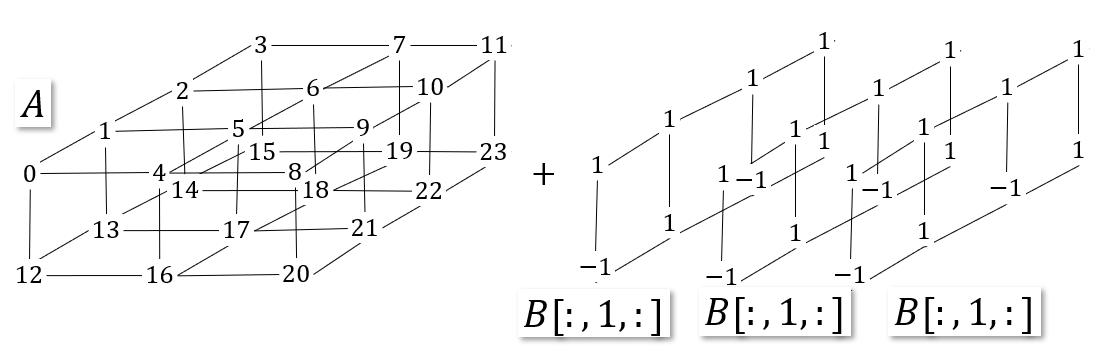  
</div>

In [34]:
A+B[:,:,2].reshape(2,3,1)  #matrica-po-matrica sabiranje po frontalnim presecima

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [15, 16, 17, 18],
        [21, 22, 23, 24]]])

Шематски приказ претходне кодне скраћенице дат је наредном сликом.
<div>
   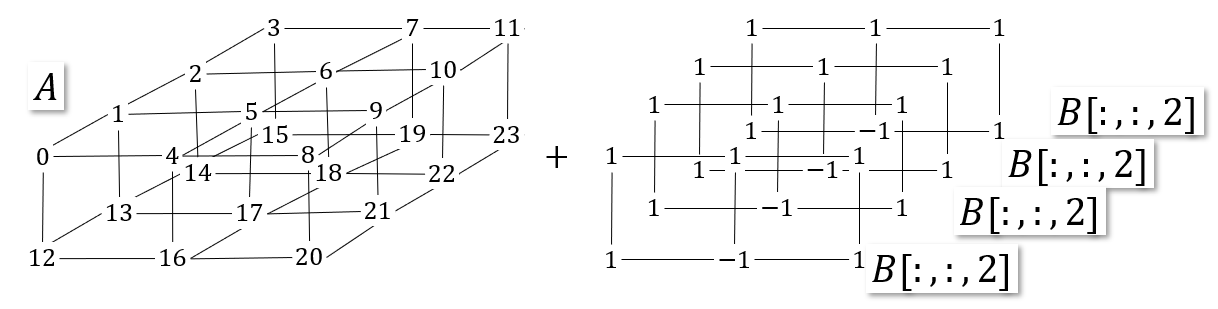  
</div>

Слично функционише вектор-по-вектор сабирање. Наредна програмска скраћеница обавља операцију која је шематски приказана сликом.

<div>
   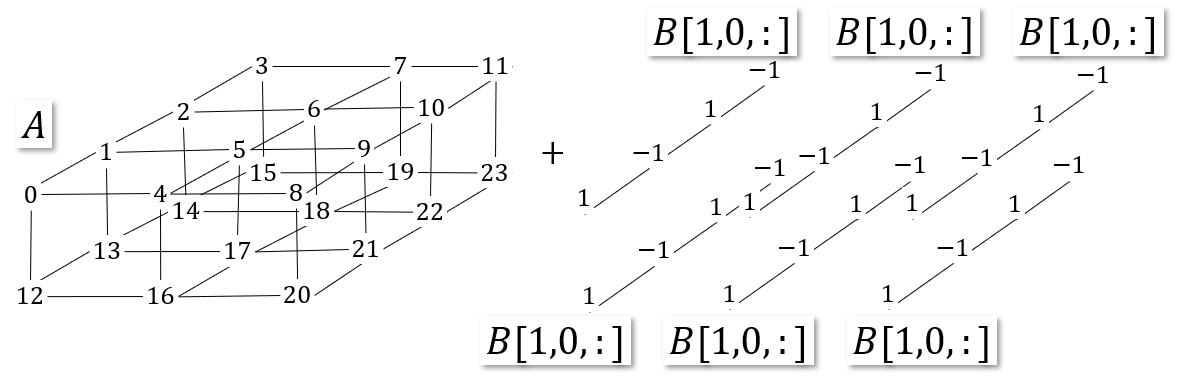  
</div>

In [35]:
A+B[1,0,:]  #vektor-po-vektor sabiranje horizontalnih bočnih vektora

array([[[ 1,  0,  3,  2],
        [ 5,  4,  7,  6],
        [ 9,  8, 11, 10]],

       [[13, 12, 15, 14],
        [17, 16, 19, 18],
        [21, 20, 23, 22]]])

<div>
   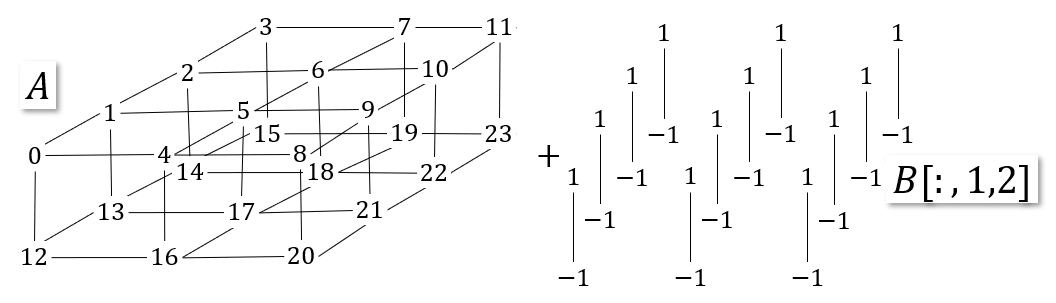  
</div>

In [36]:
A+B[:,1,2].reshape(2,1,1)  #vektor-po-vektor sabiranje vertikalnih vektora

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[11, 12, 13, 14],
        [15, 16, 17, 18],
        [19, 20, 21, 22]]])

На исти начин функционишу операција `*` и програмске скраћенице са њом.

In [37]:
A*B   #clan-po-clan mnozenje = Adamarov proivod

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12, -13,  14, -15],
        [-16,  17, -18,  19],
        [ 20, -21,  22, -23]]])

In [38]:
A*3   #clan-po-clan mnozenje jednim brojem = skaliranje

array([[[ 0,  3,  6,  9],
        [12, 15, 18, 21],
        [24, 27, 30, 33]],

       [[36, 39, 42, 45],
        [48, 51, 54, 57],
        [60, 63, 66, 69]]])

In [39]:
A*B[1]  #matrica-po-matrica množenje po horizontalnim presecima

array([[[  0,  -1,   2,  -3],
        [ -4,   5,  -6,   7],
        [  8,  -9,  10, -11]],

       [[ 12, -13,  14, -15],
        [-16,  17, -18,  19],
        [ 20, -21,  22, -23]]])

In [40]:
A*B[:,1,:].reshape(2,1,4)  #matrica-po-matrica množenje po bocnim presecima

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[-12,  13, -14,  15],
        [-16,  17, -18,  19],
        [-20,  21, -22,  23]]])

In [41]:
A*B[1,0,:]  #vektor-po-vektor množenje horizontalnih bočnih vektora

array([[[  0,  -1,   2,  -3],
        [  4,  -5,   6,  -7],
        [  8,  -9,  10, -11]],

       [[ 12, -13,  14, -15],
        [ 16, -17,  18, -19],
        [ 20, -21,  22, -23]]])

In [42]:
A*B[:,1,2].reshape(2,1,1)  #vektor-po-vektor množenje vertikalnih vektora

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[-12, -13, -14, -15],
        [-16, -17, -18, -19],
        [-20, -21, -22, -23]]])

Исто се понашају и остале основне аритметичке операције као што су дељење `/`, целобројно дељење `//` или остатак при целобројном дељењу `%`, степеновање `**`... Такође, основне математичке функције се примењују члан по члан. Остаје, јасно питање области дефинисаности примењених функција. На пример, дељење нулом ће произвести NaN вредност. Код степеновања потребно је водити рачуна о знаку степена уколико се ради о низу целобројних вредности или низу природних бројева. 

In [43]:
A/(2*B)

array([[[  0. ,   0.5,   1. ,   1.5],
        [  2. ,   2.5,   3. ,   3.5],
        [  4. ,   4.5,   5. ,   5.5]],

       [[  6. ,  -6.5,   7. ,  -7.5],
        [ -8. ,   8.5,  -9. ,   9.5],
        [ 10. , -10.5,  11. , -11.5]]])

In [44]:
B/A

<ipython-input-44-5eb9ea5eaa76>:1: RuntimeWarning: divide by zero encountered in true_divide
  B/A


array([[[        inf,  1.        ,  0.5       ,  0.33333333],
        [ 0.25      ,  0.2       ,  0.16666667,  0.14285714],
        [ 0.125     ,  0.11111111,  0.1       ,  0.09090909]],

       [[ 0.08333333, -0.07692308,  0.07142857, -0.06666667],
        [-0.0625    ,  0.05882353, -0.05555556,  0.05263158],
        [ 0.05      , -0.04761905,  0.04545455, -0.04347826]]])

In [45]:
A**2

array([[[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121]],

       [[144, 169, 196, 225],
        [256, 289, 324, 361],
        [400, 441, 484, 529]]], dtype=int32)

In [46]:
A**(-1)

ValueError: Integers to negative integer powers are not allowed.

In [47]:
A**(B+1)

array([[[  0,   1,   4,   9],
        [ 16,  25,  36,  49],
        [ 64,  81, 100, 121]],

       [[144,   1, 196,   1],
        [  1, 289,   1, 361],
        [400,   1, 484,   1]]], dtype=int32)

In [48]:
(A.astype(np.float64))**B

array([[[ 0.        ,  1.        ,  2.        ,  3.        ],
        [ 4.        ,  5.        ,  6.        ,  7.        ],
        [ 8.        ,  9.        , 10.        , 11.        ]],

       [[12.        ,  0.07692308, 14.        ,  0.06666667],
        [ 0.0625    , 17.        ,  0.05555556, 19.        ],
        [20.        ,  0.04761905, 22.        ,  0.04347826]]])

Вишедимензионални низови истог типа могу да се користе као аргументи у позиву функције `linspace()`.

In [49]:
C=np.linspace(A,2*A,5)
C.shape

(5, 2, 3, 4)

In [50]:
C

array([[[[ 0.  ,  1.  ,  2.  ,  3.  ],
         [ 4.  ,  5.  ,  6.  ,  7.  ],
         [ 8.  ,  9.  , 10.  , 11.  ]],

        [[12.  , 13.  , 14.  , 15.  ],
         [16.  , 17.  , 18.  , 19.  ],
         [20.  , 21.  , 22.  , 23.  ]]],


       [[[ 0.  ,  1.25,  2.5 ,  3.75],
         [ 5.  ,  6.25,  7.5 ,  8.75],
         [10.  , 11.25, 12.5 , 13.75]],

        [[15.  , 16.25, 17.5 , 18.75],
         [20.  , 21.25, 22.5 , 23.75],
         [25.  , 26.25, 27.5 , 28.75]]],


       [[[ 0.  ,  1.5 ,  3.  ,  4.5 ],
         [ 6.  ,  7.5 ,  9.  , 10.5 ],
         [12.  , 13.5 , 15.  , 16.5 ]],

        [[18.  , 19.5 , 21.  , 22.5 ],
         [24.  , 25.5 , 27.  , 28.5 ],
         [30.  , 31.5 , 33.  , 34.5 ]]],


       [[[ 0.  ,  1.75,  3.5 ,  5.25],
         [ 7.  ,  8.75, 10.5 , 12.25],
         [14.  , 15.75, 17.5 , 19.25]],

        [[21.  , 22.75, 24.5 , 26.25],
         [28.  , 29.75, 31.5 , 33.25],
         [35.  , 36.75, 38.5 , 40.25]]],


       [[[ 0.  ,  2.  ,  4.  ,  6.  ],
 

## Специјални методи над NumPy низовима 

Атрибут транспоновања `.T` врши замену редоследа индекса у вишедимезионалном низу тако што редослед индекса преокрене наопачке.
$$A(i_1,i_2,\dots,i_n)\quad\stackrel{T}{\mapsto}\quad A(i_n,\dots,i_2,i_1)$$

In [51]:
A.T.shape

(4, 3, 2)

In [52]:
A.T

array([[[ 0, 12],
        [ 4, 16],
        [ 8, 20]],

       [[ 1, 13],
        [ 5, 17],
        [ 9, 21]],

       [[ 2, 14],
        [ 6, 18],
        [10, 22]],

       [[ 3, 15],
        [ 7, 19],
        [11, 23]]])

In [53]:
for k in range(4):
    print(A[:,:,k].T,"\n")

[[ 0 12]
 [ 4 16]
 [ 8 20]] 

[[ 1 13]
 [ 5 17]
 [ 9 21]] 

[[ 2 14]
 [ 6 18]
 [10 22]] 

[[ 3 15]
 [ 7 19]
 [11 23]] 



Уколико желимо да применимо неку другу пермутацију индекса у вишедимензионалном низу користимо метод `transpose([permutacija])`.  Без навођења опционог аргумента `permutacija` овај метод даје исти излаз као и атрибут `.T`

In [54]:
A.transpose((0,2,1))

array([[[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]],

       [[12, 16, 20],
        [13, 17, 21],
        [14, 18, 22],
        [15, 19, 23]]])

In [55]:
A.transpose((0,2,1)).shape

(2, 4, 3)

Уколико бисмо желели испис низа A кроз фронтална сечења, то можемо да постигнемо следећим кодом.

In [56]:
A.transpose((2,0,1))

array([[[ 0,  4,  8],
        [12, 16, 20]],

       [[ 1,  5,  9],
        [13, 17, 21]],

       [[ 2,  6, 10],
        [14, 18, 22]],

       [[ 3,  7, 11],
        [15, 19, 23]]])

In [57]:
A.transpose((2,0,1)).shape

(4, 2, 3)

Слична дејства на осе (модове) у NumPy низу имају рутине [rollaxis()](https://numpy.org/doc/stable/reference/generated/numpy.rollaxis.html), [moveaxis()](https://numpy.org/doc/stable/reference/generated/numpy.moveaxis.html) и [swapaxes()](https://numpy.org/doc/stable/reference/generated/numpy.swapaxes.html).

In [58]:
np.moveaxis(A,-1,0).shape

(4, 2, 3)

In [59]:
np.moveaxis(A,1,-1).shape

(2, 4, 3)

In [60]:
np.swapaxes(A,1,-1).shape

(2, 4, 3)

In [61]:
np.swapaxes(A,0,1).shape

(3, 2, 4)

Методом `reshape()` можемо да извршимо матризацију или линеаризацију тензора. Овом наредбом се по принципу угњеждених петљи обилазе елементи вишедимезионалног низа и уписују у врсте матрице или другог вишедимензионалног низа. 

**Пример 7.** Расклапање тензора са слике по свим модовима гласе: 
<div>
   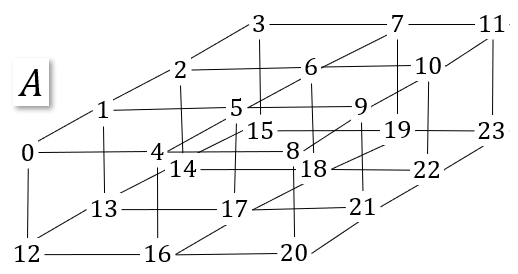  
</div>
\begin{align}
&\mathcal{A}_{[0]}=\left[\begin{array}
{cccc|cccc|cccc}
0&1&2&3&4&5&6&7&8&9&10&11\\
12&13&14&15&16&17&18&19&20&21&22&23
\end{array}\right],\\
&\mathcal{A}_{[1]}=\left[\begin{array}
{cccc|cccc}
0&1&2&3&12&13&14&15\\
4&5&6&7&16&17&18&19\\
8&9&10&11&20&21&22&23
\end{array}\right],\\
&\mathcal{A}_{[2]}=\left[\begin{array}
{ccc|ccc}
0&4&8&12&16&20\\
1&5&9&13&17&21\\
2&6&10&14&18&22\\
3&7&11&15&19&23
\end{array}\right].
\end{align}

Разлагање по првом моду добијамо наредним кодом.

In [62]:
A0=A.reshape(2,3*4)
A0

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

In [63]:
M=np.empty((2,3*4))
for i in range(2):
    for j in range(3):
        for k in range(4):
            ivrsta=(k+4*j+3*4*i)//12
            ikolona=(k+4*j+3*4*i)%12
            M[ivrsta,ikolona]=A[i,j,k]
M            

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.],
       [12., 13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]])

Истим методом вршимо склапање натраг тензора по првом моду, тј. моду $0$ у Python начину индексирања. Упоредићемо ефекат метода `reshape` са полазним тензором $A.$

In [64]:
A0.reshape(2,3,4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [65]:
A

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

Расклапање по другом и трећем моду добија се слично. Потребно је претходно извршити одговарајућу пермутацију модова како би се обезбедио одговарајући редослед "угњеждених петљи" обиласка елемената.

In [66]:
A1=np.transpose(A,(1,0,2)).reshape(3,2*4)
A1

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

Приликом склапања тонзора по моду, у позиву метода `reshape` треба навести инверзну пермутацију индекса.

In [67]:
np.transpose(A1.reshape(3,2,4),(1,0,2))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [68]:
A2=np.transpose(A,(2,0,1)).reshape(4,2*3)
A2

array([[ 0,  4,  8, 12, 16, 20],
       [ 1,  5,  9, 13, 17, 21],
       [ 2,  6, 10, 14, 18, 22],
       [ 3,  7, 11, 15, 19, 23]])

In [69]:
np.transpose(A2.reshape(4,2,3),(1,2,0))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

И векторизација тензора је директна методом `reshape()`.

In [70]:
vecA=A.reshape(2*3*4,)
vecA

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [71]:
vecA.reshape(2,3,4)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## Множење тензора

**Дефиниција 1.**     Нека су $\mathcal{A}\in\mathcal{M}_{m_1\times m_2\times\dots\times m_n}$ и $\mathcal{B}\in\mathcal{M}_{s_1\times s_2\times\dots\times s_r}$ тензори датог типа. Њихов тензорски производ $\mathcal{C}=\mathcal{A}\otimes\mathcal{B}$ је тензор типа $\mathcal{C}\in\mathcal{M}_{m_1\times m_2\times\dots\times m_n\times s_1\times s_2\times\dots\times s_r}$ за који важи
\begin{align}
        &\forall v_{i}\in\mathbb{R}^{m_i},\ i\in[n],\qquad
        \forall u_{j}\in\mathbb{R}^{s_j},\ j\in[r],\\[6pt]
        &\mathcal{C}(v_1,v_2,\dots,v_{n},u_1,u_2,\dots,u_{r})=\mathcal{A}(v_1,v_2,\dots,v_{n})\,
        \mathcal{B}(u_1,u_2,\dots,u_{r}).
\end{align} 

Тензорски производ из ове дефиниције добија се наредбом `tensordot` навођењем опције `axes=0`.

In [72]:
print(A.shape)
print(B.shape)

(2, 3, 4)
(2, 3, 4)


In [73]:
np.tensordot(A,B,axes=0).shape

(2, 3, 4, 2, 3, 4)

**Дефиниција 2.**     Нека су дати тензор $\mathcal{A}\in\mathcal{M}_{m_1\times\dots\times m_n}$  и матрица $M\in\mathcal{M}_{p\times m_k}.$ Производ мода $k$ је операција 
$$\times_k\ :\ \mathcal{M}_{m_1\times\dots\times m_{k-1}\times m_k\times m_{k+1}\times\dots\times m_n}\mapsto \mathcal{M}_{m_1\times\dots\times m_{k-1}\times p\times m_{k+1}\times\dots\times m_n}$$
чији резултујући тензор има расклапање мода $k:$
$$(\mathcal{A}\times_k M)_{[k]}=M\,\mathcal{A}_{[k]},$$
где је израз $M\,\mathcal{A}_{[k]}$ класично множење матрица.

Тензорски производ из ове дефиниције добија се наредбом `tensordot` навођењем опције `axes=1`, уз адекватну пермутацију оса тензора

За пример израчунавања производа по моду искористићемо тензор $A$ из примерa 7 и већ израчуната расклапања по моду за њега $A0,A1,A2.$

In [74]:
M0=np.ones((3,2))
print(M0.shape)
print(A0.shape)

(3, 2)
(2, 12)


In [75]:
AM0=(M0@A0).reshape((3,3,4))  #mnozenje po modu 0 i sklapanje tenzora
AM0

array([[[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]],

       [[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]],

       [[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]]])

In [76]:
np.tensordot(M0,A,axes=1).shape

(3, 3, 4)

In [77]:
np.tensordot(M0,A,axes=1)

array([[[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]],

       [[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]],

       [[12., 14., 16., 18.],
        [20., 22., 24., 26.],
        [28., 30., 32., 34.]]])

In [78]:
M1=np.eye(2,3)
AM1=np.transpose((M1@A1).reshape(2,2,4),(1,0,2))  #mnozenje po modu 1 i sklapanje tenzora
AM1

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.]]])

In [79]:
np.tensordot(M1,np.transpose(A,(1,0,2)),axes=1).shape

(2, 2, 4)

In [80]:
np.transpose(np.tensordot(M1,np.transpose(A,(1,0,2)),axes=1),(1,0,2))

array([[[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.]],

       [[12., 13., 14., 15.],
        [16., 17., 18., 19.]]])

In [81]:
M2=np.ones((2,4))
AM2=np.transpose((M2@A2).reshape(2,2,3),(1,2,0))
AM2

array([[[ 6.,  6.],
        [22., 22.],
        [38., 38.]],

       [[54., 54.],
        [70., 70.],
        [86., 86.]]])

In [82]:
np.tensordot(M2,np.transpose(A,(2,0,1)),axes=1).shape

(2, 2, 3)

In [83]:
np.transpose(np.tensordot(M2,np.transpose(A,(2,0,1)),axes=1),(1,2,0))

array([[[ 6.,  6.],
        [22., 22.],
        [38., 38.]],

       [[54., 54.],
        [70., 70.],
        [86., 86.]]])

**Дефиниција 3.** Нека су дати тензори $\mathcal{A}\in\mathcal{M}_{m_1\times \dots\times m_n\times p_1\times\dots\times p_l}$ и $\mathcal{B}\in\mathcal{M}_{p_1\times\dots\times p_l\times q_1\times\dots\times q_s}.$ Контракција заједничких модова $p_1,\dots,p_l$ ова два тензора је операција
$$\langle\cdot,\cdot\rangle_{l}\ :\ \mathcal{M}_{m_1\times \dots\times m_n\times p_1\times\dots\times p_l}\times
    \mathcal{M}_{p_1\times\dots\times p_l\times q_1\times\dots\times q_s}\ \mapsto\ 
    \mathcal{M}_{m_1\times \dots\times m_n\times q_1\times\dots\times q_s}$$
задата покомпонентно
\begin{align}    
\mathcal{C}&=[c_{i_1\dots i_nk_1\dots k_s}]=\langle\mathcal{A},\mathcal{B}\rangle_{l},
\qquad 
\mathcal{A}=[a_{i_1\dots i_nj_1\dots j_l}],\quad 
\mathcal{B}=[b_{j_1\dots j_lk_1\dots k_s}],
\\
    &c_{i_1\dots i_nk_1\dots k_s}=
    \displaystyle\sum_{j_1=1}^{p_1}\displaystyle\sum_{j_2=1}^{p_2}\dots
    \displaystyle\sum_{j_l=1}^{p_l}
    a_{i_1\dots i_nj_1\dots j_l}
    b_{j_1\dots j_lk_1\dots k_s}.
\end{align}   

Функција `tensordot` навођењем опције `axes=l` (иначе подразумевана вредност је `axes=2`) врши контракцију два тензора по $l$ димензија. Потребно је водити рачуна да постоји једнакост одговарајућих опсега одабраних димензија.

In [84]:
print(A.shape)
print(B.shape)
np.transpose(B,(1,2,0)).shape

(2, 3, 4)
(2, 3, 4)


(3, 4, 2)

In [85]:
np.tensordot(A,np.transpose(B,(1,2,0))).shape

(2, 2)

In [86]:
print(np.transpose(B).shape)
np.tensordot(A,np.transpose(B),axes=1).shape

(4, 3, 2)


(2, 3, 3, 2)

In [87]:
np.tensordot(A,B,axes=3).shape

()

In [88]:
print(np.tensordot(A,B,axes=3))

64
